# ACS data catalogue demo - 116TB of data

#### ccam_noresm2-mm_historical_aus-10i_12km = 50TB
#### ccam_noresm2-mm_ssp126_aus-10i_12km = 66TB

# Using "small" ARE cluster at NCI ( 2 CPU & 9GB RAM )
cost = 2.5SU's per hour = 10 cents / hour

### required packages

In [1]:
import intake
import xarray as xr
from matplotlib import pyplot as plt

### start a local Dask client

In [2]:
from dask.distributed import Client
client = Client()
client

2023-05-18 16:35:57,023 - distributed.diskutils - INFO - Found stale lock file and directory '/jobfs/84139172.gadi-pbs/dask-worker-space/worker-5ps58tty', purging
2023-05-18 16:35:57,024 - distributed.diskutils - INFO - Found stale lock file and directory '/jobfs/84139172.gadi-pbs/dask-worker-space/worker-3ys2gk01', purging


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 2
Total threads: 2,Total memory: 9.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:41847,Workers: 2
Dashboard: /proxy/8787/status,Total threads: 2
Started: Just now,Total memory: 9.00 GiB
Comm: tcp://127.0.0.1:44861,Total threads: 1
Dashboard: /proxy/46267/status,Memory: 4.50 GiB
Nanny: tcp://127.0.0.1:40005,


### ignore warnings

In [3]:
import warnings
warnings.filterwarnings('ignore')

# open the DF catalogue

In [4]:
df_cat = intake.open_df_catalog(
    path="/g/data/v14/tm4888/code/ACS/data-catalogue/catalogues/root_df_catalog.csv",
    columns_with_iterables=["variable"],
)

In [5]:
df_cat

,model,variable
name,,
ccam_noresm2-mm_historical_aus-10i_12km,{ccam_noresm2-mm_historical_aus-10i_12km},"{va1000, wa700, mrfsol, clt, ta200, va400, hfls, ua20, clivi, ua300, zg250, ta500, zg300, prw, zg70, ua70, hus850, zg30, va250, zg20, zg200, wa1000, va100m, va10, ua600, ua30, hus200, rsds, snd, u..."
ccam_noresm2-mm_ssp126_aus-10i_12km,{ccam_noresm2-mm_ssp126_aus-10i_12km},"{va1000, wa700, mrfsol, clt, ta200, va400, hfls, ua20, clivi, ua300, zg250, ta500, zg300, prw, zg70, ua70, hus850, zg30, va250, zg20, zg200, wa1000, va100m, va10, ua600, ua30, hus200, rsds, snd, u..."


# what are the unique variables?

In [6]:
df_cat.unique()['variable']

['va1000',
 'wa700',
 'mrfsol',
 'clt',
 'ta200',
 'va400',
 'hfls',
 'ua20',
 'clivi',
 'ua300',
 'zg250',
 'ta500',
 'zg300',
 'prw',
 'zg70',
 'ua70',
 'hus850',
 'zg30',
 'va250',
 'zg20',
 'zg200',
 'wa1000',
 'va100m',
 'va10',
 'ua600',
 'ua30',
 'hus200',
 'rsds',
 'snd',
 'ua500',
 'zg50',
 'mrsol',
 'hus100',
 'va300m',
 'hurs',
 'ta400',
 'snc',
 'snw',
 'ta700',
 'snm',
 'ta100',
 'tas',
 'CIN',
 'zg400',
 'tauv',
 'va50m',
 'rlutcs',
 'hus10',
 'rsus',
 'va150m',
 'uas',
 'ua10',
 'ta300',
 'hus300',
 'zmla',
 'CAPE',
 'va200m',
 'zg500',
 'ta50',
 'clh',
 'ua200',
 'zg100',
 'tasmin',
 'va30',
 'ta30',
 'tsl',
 'zg10',
 'wa100',
 'clm',
 'rluscs',
 'ta925',
 'rsut',
 'va700',
 'ua150m',
 'hus30',
 'va500',
 'ta600',
 'rsdsdir',
 'rsdt',
 'huss',
 'va250m',
 'ta70',
 'vas',
 'rsutcs',
 'va600',
 'rsdscs',
 'wa600',
 'mrso',
 'hus250',
 'hus500',
 'mrfso',
 'ta850',
 'wa70',
 'mrfsos',
 'wa500',
 'wa150',
 'ua850',
 'wa250',
 'rlds',
 'evspsblpot',
 'pr',
 'ua150',
 'prhmax

# find all variables with "tas" via `regex`

In [7]:
tas_cat = df_cat.search(variable=".*tas.*")
tas_cat

,model,variable
name,,
ccam_noresm2-mm_historical_aus-10i_12km,{ccam_noresm2-mm_historical_aus-10i_12km},"{tasmin, tas, tasmax}"
ccam_noresm2-mm_ssp126_aus-10i_12km,{ccam_noresm2-mm_ssp126_aus-10i_12km},"{tasmin, tas, tasmax}"


In [8]:
tas_hist_cat = df_cat.search(variable="tas",model="ccam_noresm2-mm_historical_aus-10i_12km")
tas_hist_cat

,model,variable
name,,
ccam_noresm2-mm_historical_aus-10i_12km,{ccam_noresm2-mm_historical_aus-10i_12km},{tas}


In [9]:
tas_hist_cat.df

,model,variable,name,yaml
0,ccam_noresm2-mm_historical_aus-10i_12km,[tas],ccam_noresm2-mm_historical_aus-10i_12km,sources:\n ccam_noresm2-mm_historical_aus-10i_12km:\n args:\n obj: /g/data/v14/tm4888/code/ACS/data-catalogue/catalogues/nested_test/ccam_noresm2-mm_historical_aus-10i_12km/ccam_noresm2-m...


# Load the `intake` source for this search

In [10]:
tas_hist_source = tas_hist_cat.to_source()
tas_hist_source

,unique
variable,176
domain,1
host_GCM,1
run_type,1
...,...
period,4
time_period,4
path,32960
derived_variable,0


# Developer working on way to pass higher level search onto the source - specific to `intake-esm` packages

# for now must search twice

In [11]:
tas_hist_source = tas_hist_source.search(variable="tas")
tas_hist_source

,unique
variable,1
domain,1
host_GCM,1
run_type,1
...,...
period,3
time_period,3
path,192
derived_variable,0


# use `keys_info()` for another view

In [12]:
tas_hist_source.keys_info()

,domain,host_GCM,run_type,host_ensemble,downscale_model,downscale_version,period
key,,,,,,,
AUS-10i.NCC-NorESM2-MM.historical.r1i1p1f1.CSIRO-CCAM-2203.v1.1hr,AUS-10i,NCC-NorESM2-MM,historical,r1i1p1f1,CSIRO-CCAM-2203,v1,1hr
AUS-10i.NCC-NorESM2-MM.historical.r1i1p1f1.CSIRO-CCAM-2203.v1.day,AUS-10i,NCC-NorESM2-MM,historical,r1i1p1f1,CSIRO-CCAM-2203,v1,day
AUS-10i.NCC-NorESM2-MM.historical.r1i1p1f1.CSIRO-CCAM-2203.v1.mon,AUS-10i,NCC-NorESM2-MM,historical,r1i1p1f1,CSIRO-CCAM-2203,v1,mon


# select only monthly data

In [13]:
monthly_tas_hist = tas_hist_source.search(period='mon')
monthly_tas_hist

,unique
variable,1
domain,1
host_GCM,1
run_type,1
...,...
period,1
time_period,1
path,64
derived_variable,0


In [14]:
monthly_tas_hist.df

,variable,domain,host_GCM,run_type,host_ensemble,downscale_model,downscale_version,period,time_period,path
0,tas,AUS-10i,NCC-NorESM2-MM,historical,r1i1p1f1,CSIRO-CCAM-2203,v1,mon,monthly,/g/data/xv83/mxt599/ccam_noresm2-mm_historical_aus-10i_12km/drs_cordex/CORDEX/output/AUS-10i/CSIRO/NCC-NorESM2-MM/historical/r1i1p1f1/CSIRO-CCAM-2203/v1/mon/tas/tas_AUS-10i_NCC-NorESM2-MM_historic...
1,tas,AUS-10i,NCC-NorESM2-MM,historical,r1i1p1f1,CSIRO-CCAM-2203,v1,mon,monthly,/g/data/xv83/mxt599/ccam_noresm2-mm_historical_aus-10i_12km/drs_cordex/CORDEX/output/AUS-10i/CSIRO/NCC-NorESM2-MM/historical/r1i1p1f1/CSIRO-CCAM-2203/v1/mon/tas/tas_AUS-10i_NCC-NorESM2-MM_historic...
2,tas,AUS-10i,NCC-NorESM2-MM,historical,r1i1p1f1,CSIRO-CCAM-2203,v1,mon,monthly,/g/data/xv83/mxt599/ccam_noresm2-mm_historical_aus-10i_12km/drs_cordex/CORDEX/output/AUS-10i/CSIRO/NCC-NorESM2-MM/historical/r1i1p1f1/CSIRO-CCAM-2203/v1/mon/tas/tas_AUS-10i_NCC-NorESM2-MM_historic...
3,tas,AUS-10i,NCC-NorESM2-MM,historical,r1i1p1f1,CSIRO-CCAM-2203,v1,mon,monthly,/g/data/xv83/mxt599/ccam_noresm2-mm_historical_aus-10i_12km/drs_cordex/CORDEX/output/AUS-10i/CSIRO/NCC-NorESM2-MM/historical/r1i1p1f1/CSIRO-CCAM-2203/v1/mon/tas/tas_AUS-10i_NCC-NorESM2-MM_historic...
...,...,...,...,...,...,...,...,...,...,...
60,tas,AUS-10i,NCC-NorESM2-MM,historical,r1i1p1f1,CSIRO-CCAM-2203,v1,mon,monthly,/g/data/xv83/mxt599/ccam_noresm2-mm_historical_aus-10i_12km/drs_cordex/CORDEX/output/AUS-10i/CSIRO/NCC-NorESM2-MM/historical/r1i1p1f1/CSIRO-CCAM-2203/v1/mon/tas/tas_AUS-10i_NCC-NorESM2-MM_historic...
61,tas,AUS-10i,NCC-NorESM2-MM,historical,r1i1p1f1,CSIRO-CCAM-2203,v1,mon,monthly,/g/data/xv83/mxt599/ccam_noresm2-mm_historical_aus-10i_12km/drs_cordex/CORDEX/output/AUS-10i/CSIRO/NCC-NorESM2-MM/historical/r1i1p1f1/CSIRO-CCAM-2203/v1/mon/tas/tas_AUS-10i_NCC-NorESM2-MM_historic...
62,tas,AUS-10i,NCC-NorESM2-MM,historical,r1i1p1f1,CSIRO-CCAM-2203,v1,mon,monthly,/g/data/xv83/mxt599/ccam_noresm2-mm_historical_aus-10i_12km/drs_cordex/CORDEX/output/AUS-10i/CSIRO/NCC-NorESM2-MM/historical/r1i1p1f1/CSIRO-CCAM-2203/v1/mon/tas/tas_AUS-10i_NCC-NorESM2-MM_historic...
63,tas,AUS-10i,NCC-NorESM2-MM,historical,r1i1p1f1,CSIRO-CCAM-2203,v1,mon,monthly,/g/data/xv83/mxt599/ccam_noresm2-mm_historical_aus-10i_12km/drs_cordex/CORDEX/output/AUS-10i/CSIRO/NCC-NorESM2-MM/historical/r1i1p1f1/CSIRO-CCAM-2203/v1/mon/tas/tas_AUS-10i_NCC-NorESM2-MM_historic...


# load catalogue entries into a dictionary of `xarray` datasets

In [15]:
DS_dict = monthly_tas_hist.to_dataset_dict()


--> The keys in the returned dictionary of datasets are constructed as follows:
	'domain.host_GCM.run_type.host_ensemble.downscale_model.downscale_version.period'


In [16]:
DS_dict

{'AUS-10i.NCC-NorESM2-MM.historical.r1i1p1f1.CSIRO-CCAM-2203.v1.mon': <xarray.Dataset>
 Dimensions:   (time: 768, lat: 611, lon: 928, bnds: 2)
 Coordinates:
   * time      (time) object 1951-01-15 12:00:00 ... 2014-12-15 12:00:00
     lat_bnds  (lat, bnds) float32 dask.array<chunksize=(611, 2), meta=np.ndarray>
     lon_bnds  (lon, bnds) float32 dask.array<chunksize=(928, 2), meta=np.ndarray>
   * lon       (lon) float64 89.3 89.4 89.5 89.6 89.7 ... 181.7 181.8 181.9 182.0
   * lat       (lat) float64 -52.3 -52.2 -52.1 -52.0 -51.9 ... 8.4 8.5 8.6 8.7
 Dimensions without coordinates: bnds
 Data variables:
     tas       (time, lat, lon) float32 dask.array<chunksize=(12, 611, 928), meta=np.ndarray>
 Attributes: (12/29)
     axiom_version:                       0.1.0
     axiom_schemas_version:               0.1.0
     axiom_schema:                        CORDEX
     contact:                             Marcus Thatcher (Marcus.Thatcher@csi...
     Conventions:                         CF-1

# or, this this simple case a single `xarray` dataset

In [17]:
DS = monthly_tas_hist.to_dask()

In [18]:
DS

<xarray.Dataset>
Dimensions:   (time: 768, lat: 611, lon: 928, bnds: 2)
Coordinates:
  * time      (time) object 1951-01-15 12:00:00 ... 2014-12-15 12:00:00
    lat_bnds  (lat, bnds) float32 dask.array<chunksize=(611, 2), meta=np.ndarray>
    lon_bnds  (lon, bnds) float32 dask.array<chunksize=(928, 2), meta=np.ndarray>
  * lon       (lon) float64 89.3 89.4 89.5 89.6 89.7 ... 181.7 181.8 181.9 182.0
  * lat       (lat) float64 -52.3 -52.2 -52.1 -52.0 -51.9 ... 8.4 8.5 8.6 8.7
Dimensions without coordinates: bnds
Data variables:
    tas       (time, lat, lon) float32 dask.array<chunksize=(12, 611, 928), meta=np.ndarray>
Attributes: (12/29)
    axiom_version:                       0.1.0
    axiom_schemas_version:               0.1.0
    axiom_schema:                        CORDEX
    contact:                             Marcus Thatcher (Marcus.Thatcher@csi...
    Conventions:                         CF-1.7
    CORDEX_domain:                       AUS-10i
    ...                                  ...
    intake_esm_attrs:downscale_model:    CSIRO-CCAM-2203
    intake_esm_attrs:downscale_version:  v1
    intake_esm_attrs:period:             mon
    intake_esm_attrs:time_period:        monthly
    intake_esm_attrs:_data_format_:      netcdf
    intake_esm_dataset_key:              AUS-10i.NCC-NorESM2-MM.historical.r1...

# this selection is reduced to only 1.62 GB
## so lets load into memory for quick calculations

### NOTE: all these loads rely on `xarray` `openMF_dataset` which uses `netCDF4` which wraps `netcdf-c`.  Errors were introduced with `netcdf4` 1.6.1.  A 1.6.4 fix is underway, maybe? See: 
https://forum.access-hive.org.au/t/netcdf-not-a-valid-id-errors/389
### so we've downgraded `netcdf4` to `1.6.0` in this `ACS-demo` environment

In [19]:
%%time
data = DS.compute()

CPU times: user 1.44 s, sys: 23.3 s, total: 24.7 s
Wall time: 56.4 s


In [20]:
data

<xarray.Dataset>
Dimensions:   (time: 768, lat: 611, lon: 928, bnds: 2)
Coordinates:
  * time      (time) object 1951-01-15 12:00:00 ... 2014-12-15 12:00:00
    lat_bnds  (lat, bnds) float32 -52.35 -52.25 -52.25 -52.15 ... 8.65 8.65 8.75
    lon_bnds  (lon, bnds) float32 89.25 89.35 89.35 89.45 ... 181.9 181.9 182.1
  * lon       (lon) float64 89.3 89.4 89.5 89.6 89.7 ... 181.7 181.8 181.9 182.0
  * lat       (lat) float64 -52.3 -52.2 -52.1 -52.0 -51.9 ... 8.4 8.5 8.6 8.7
Dimensions without coordinates: bnds
Data variables:
    tas       (time, lat, lon) float32 279.5 279.5 279.5 ... 302.1 302.1 302.1
Attributes: (12/29)
    axiom_version:                       0.1.0
    axiom_schemas_version:               0.1.0
    axiom_schema:                        CORDEX
    contact:                             Marcus Thatcher (Marcus.Thatcher@csi...
    Conventions:                         CF-1.7
    CORDEX_domain:                       AUS-10i
    ...                                  ...
    intake_esm_attrs:downscale_model:    CSIRO-CCAM-2203
    intake_esm_attrs:downscale_version:  v1
    intake_esm_attrs:period:             mon
    intake_esm_attrs:time_period:        monthly
    intake_esm_attrs:_data_format_:      netcdf
    intake_esm_dataset_key:              AUS-10i.NCC-NorESM2-MM.historical.r1...

# convert K temperatures to C

In [21]:
tas_C = data.tas - 273.15

# some basic plots and calculations using DASK across all our workers

### Time mean TAS

In [27]:
%%time
hist_tas_mean = tas_C.mean('time')                    

CPU times: user 2.97 s, sys: 1.06 s, total: 4.03 s
Wall time: 3.54 s


Text(0.5, 1.0, 'Time mean TAS\n Historical\n NCC-NorESM2-MM CCAM')

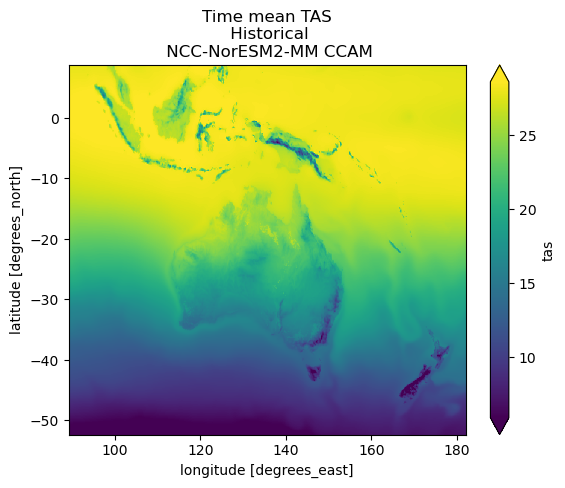

In [29]:
hist_tas_mean.plot(robust=True)
plt.title('Time mean TAS\n Historical\n NCC-NorESM2-MM CCAM')


### climatology

In [32]:
%%time
season_tas_C = tas_C.groupby('time.season').mean('time').compute()

CPU times: user 1.99 s, sys: 1.43 s, total: 3.42 s
Wall time: 3.06 s


Text(0.5, 1.0, 'DJF season TAS\n Historical\n NCC-NorESM2-MM CCAM')

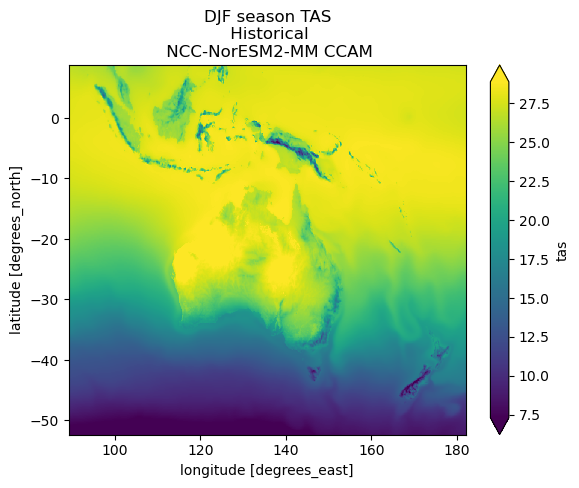

In [33]:
season_tas_C.sel(season='DJF').plot(robust=True)
plt.title('DJF season TAS\n Historical\n NCC-NorESM2-MM CCAM')

# TLDR

CPU times: user 2.13 s, sys: 130 ms, total: 2.26 s
Wall time: 9.04 s


Text(0.5, 1.0, 'DJF season TAS\n Historical\n NCC-NorESM2-MM CCAM')

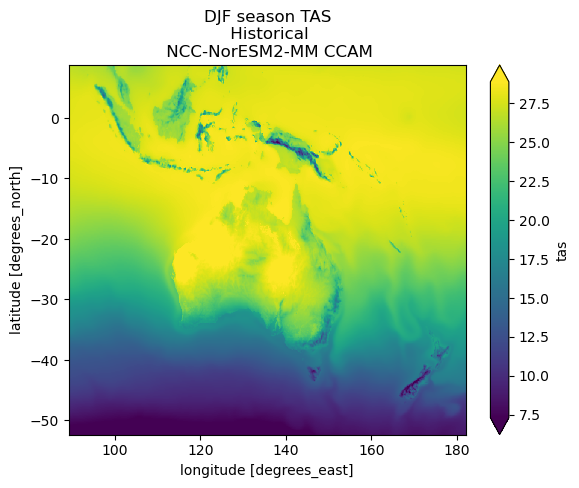

In [5]:
%%time
#load root catalogue
df_cat = intake.open_df_catalog(
    path="/g/data/v14/tm4888/code/ACS/data-catalogue/catalogues/root_df_catalog.csv",
    columns_with_iterables=["variable"],
)
#find data source and search across data source
tas_hist_cat = df_cat.search(variable="tas",model="ccam_noresm2-mm_historical_aus-10i_12km")
tas_hist_source = tas_hist_cat.to_source()
monthly_tas_hist = tas_hist_source.search(variable="tas",period='mon')
# load data lazily 
DS = monthly_tas_hist.to_dask()
# convert to C from K
tas_C = DS.tas - 273.15
#calculate seasonal clim
season_tas_C = tas_C.groupby('time.season').mean('time')
#plot
season_tas_C.sel(season='DJF').plot(robust=True)
plt.title('DJF season TAS\n Historical\n NCC-NorESM2-MM CCAM')

# The End

In [ ]:
client.restart()

In [6]:
client.close()